# 📘 Projet Deep Learning : Classification des chiffres manuscrits (MNIST)
Ce notebook montre comment construire un modèle de réseau de neurones (ANN) simple avec Keras pour classer les chiffres manuscrits.

In [10]:
# 📦 Étape 1 : Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.utils import to_categorical

In [22]:
# 📁 Étape 2 : Chargement et préparation des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalisation des pixels
X_train = X_train / 255.0
X_test = X_test / 255.0

# Encodage one-hot des labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Affichage des formes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000, 10)


In [12]:
# 🧠 Étape 3 : Création du modèle ANN
model = Sequential([
    Input(shape=(28, 28, 1)),  # Définir l'entrée (28x28 images en grayscale)
    Flatten(),  # Aplatir les images
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])  # 10 classes

In [14]:
# ⚙️ Étape 4 : Compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# 🚀 Étape 5 : Entraînement du modèle
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8600 - loss: 0.4826 - val_accuracy: 0.9592 - val_loss: 0.1410
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9644 - loss: 0.1212 - val_accuracy: 0.9603 - val_loss: 0.1247
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9774 - loss: 0.0769 - val_accuracy: 0.9680 - val_loss: 0.1019
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9810 - loss: 0.0600 - val_accuracy: 0.9728 - val_loss: 0.1020
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9864 - loss: 0.0430 - val_accuracy: 0.9747 - val_loss: 0.0915
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9901 - loss: 0.0323 - val_accuracy: 0.9729 - val_loss: 0.1002
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.9741 - val_loss: 0.1023
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9924 - loss: 0.0

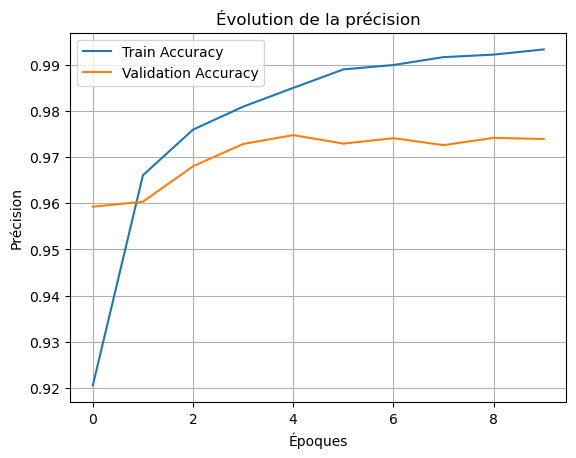

In [18]:
# 📊 Étape 6 : Visualisation de l'entraînement
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Évolution de la précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# 🧪 Étape 7 : Évaluation sur les données de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9701 - loss: 0.1282
Test Accuracy: 97.64%


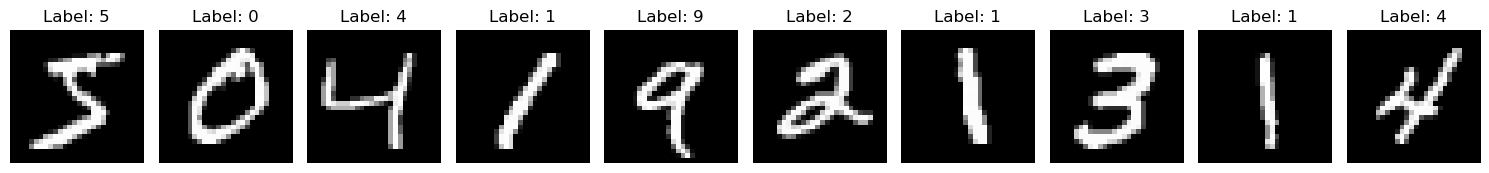

In [24]:
import matplotlib.pyplot as plt

# Affichage des 10 premières images du dataset MNIST
fig, axes = plt.subplots(1, 10, figsize=(15, 15))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(X_train[i].reshape(28, 28), cmap='gray')  # Redimensionne chaque image en 28x28
    axes[i].set_title(f"Label: {y_train[i].argmax()}")  # Affiche l'étiquette (label)
    axes[i].axis('off')  # Masque les axes

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


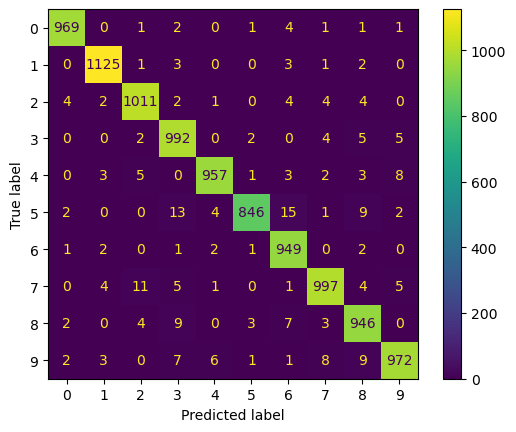

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
ConfusionMatrixDisplay(cm).plot()
